# Appentissage supervisé pour des données avec classes désequilibrées.

In [16]:
import sys
assert sys.version_info >= (3, 7)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

cwd = Path.cwd()
UEDA_PATH = cwd.parent.parent

DATA_PATH = f'{UEDA_PATH}/data'
bank_df = pd.read_csv(f'{DATA_PATH}/bank-additional-full.csv')
cred_df = pd.read_csv(f'{DATA_PATH}/creditcard.csv')
attr_df = pd.read_csv(f'{DATA_PATH}/whole data.csv')

And let's create the images/svm folder (if it doesn't already exist), and define the save_fig() function which is used through this notebook to save the figures in high-res

In [18]:
IMAGES_PATH = Path() / "images" / "ueda"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Analyse exploratoire des données déséquilibrées

### Analyse exploratoire des attributs

#### Credit fraud

In [19]:
# dim
cred_df.shape

(284807, 31)

In [20]:
# overview
cred_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


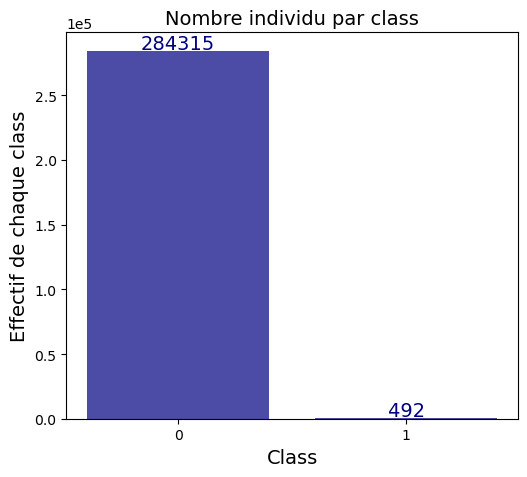

In [30]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(5.5, 5))
counts = cred_df['Class'].value_counts()
ax.bar(counts.index, counts.values, color='navy', alpha=0.7)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: counts.index[int(x)]))

ax.set_xlabel('Class')
ax.set_ylabel('Effectif de chaque class')
ax.set_title('Nombre individu par class')

# we use ax.set_xticks and pass in a range of integers from 0 to the length of counts. 
# This ensures that we have one tick for each bar in the chart.
ax.set_xticks(range(len(counts))) 
# we use ax.set_xticklabels and pass in the index values from counts. 
# This sets the tick labels to be the same as the original index values in counts.
ax.set_xticklabels(counts.index)

# pour des labels plus compacts
ax.ticklabel_format(axis='y', scilimits=(1, 4))

# annotations
for i, j in enumerate(counts):
    ax.text(i, j+1500, counts.iloc[i], ha='center', color='navy')
    
# save image 
save_fig("class_barplot")
plt.show()